# Store Sales - Time Series Forecasting
Predicts the unit sales for thousands of items sold at different Favorita stores. Datatypes of dates, store, and item information, promotions, and unit sales are given.

In [221]:
import pandas as pd # linear algebra
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visuals
import seaborn as sns # visuals
from warnings import simplefilter

simplefilter("ignore")  # ignore warnings to clean up output cells



train = pd.read_csv('train.csv',parse_dates=['date'], infer_datetime_format=True).drop(['family', 'id', 'store_nbr','onpromotion'], axis=1)

test = pd.read_csv('test.csv')

# importing additional data
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
transactions = pd.read_csv('transactions.csv')
holidays = pd.read_csv('holidays_events.csv')

train.head()


,date,sales
0,2013-01-01,0.0
1,2013-01-01,0.0
2,2013-01-01,0.0
3,2013-01-01,0.0
4,2013-01-01,0.0


In [234]:
sales = train.copy()
avg_sales = train.groupby('date').mean()

In [237]:
avg_sales['time'] = np.arange(len(avg_sales.index))
avg_sales.head()

,sales,time
date,,
2013-01-01,1.409438,0
2013-01-02,278.390807,1
2013-01-03,202.840197,2
2013-01-04,198.911154,3
2013-01-05,267.873244,4


In [238]:
from sklearn.linear_model import LinearRegression

# Training data
X = avg_sales.loc[:, ['time']]  # features
y = avg_sales.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

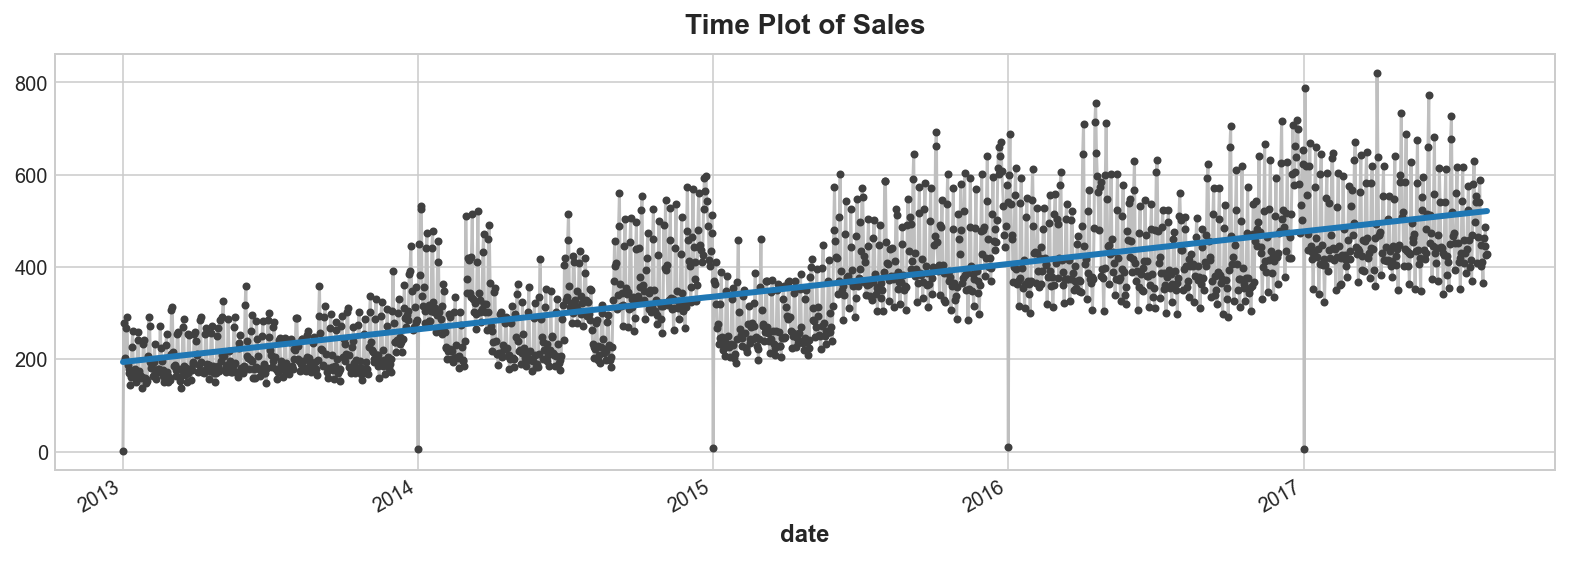

In [239]:
simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Sales');

In [241]:
avg_sales['Lag_1'] = avg_sales['sales'].shift(1)
avg_sales.head()

,sales,time,Lag_1
date,,,
2013-01-01,1.409438,0,NaN
2013-01-02,278.390807,1,1.409438
2013-01-03,202.840197,2,278.390807
2013-01-04,198.911154,3,202.840197
2013-01-05,267.873244,4,198.911154


In [243]:
from sklearn.linear_model import LinearRegression

X = avg_sales.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = avg_sales.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

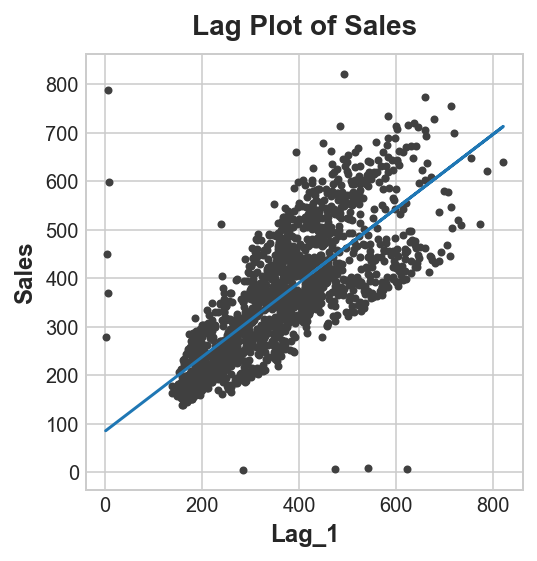

In [244]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Sales');

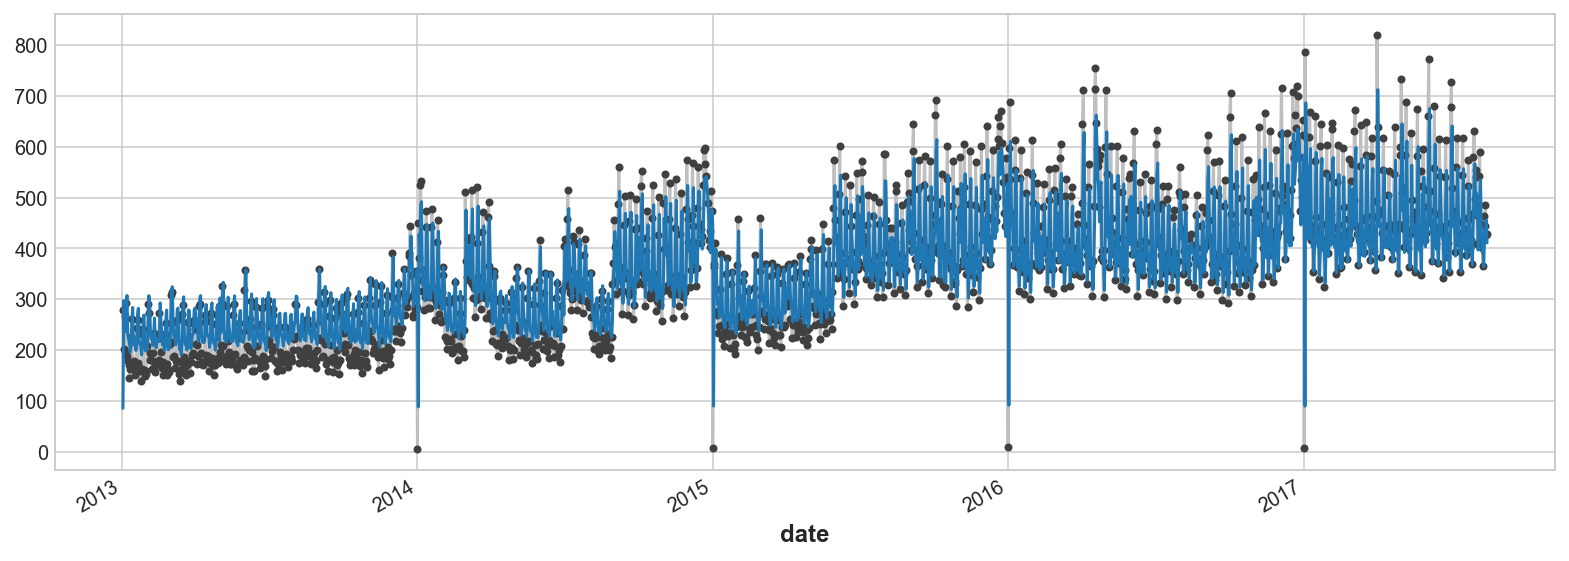

In [245]:
ax = y.plot(**plot_params)
ax = y_pred.plot()